In [196]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression

# Childhood Respiratory Disease

Keywords: polynomial regression, multiple regression.

## Description

FEV (forced expiratory volume) is an index of pulmonary function that measures the volume of air expelled after one second of constant effort. The data contains determinations of FEV on 654 children ages 6-22 who were seen in the Childhood Respiratory Desease Study in 1980 in East Boston, Massachusetts. The data are part of a larger study to follow the change in pulmonary function over time in children.

ID	 - 	ID number
Age	 - 	years
FEV	 - 	litres
Height	 - 	inches
Sex	 - 	Male or Female
Smoker	 - 	Non = nonsmoker, Current = current smoker


## Source

Tager, I. B., Weiss, S. T., Rosner, B., and Speizer, F. E. (1979). Effect of parental cigarette smoking on pulmonary function in children. American Journal of Epidemiology, 110, 15-26.
Rosner, B. (1990). Fundamentals of Biostatistics, 3rd Edition. PWS-Kent, Boston, Massachusetts.


In [241]:
# Read the csv file into a pandas DataFrame

shots = pd.read_csv('DBexport_knicks.csv')
shots

,id,grid_type,game_id,game_event_id,player_id,player_name,team_id,team_name,period,minutes_remaining,...,shot_zone_range,shot_distance,loc_x,loc_y,shot_attempted_flag,shot_made_flag,game_date,htm,vtm,current_team
0,168012,Shot Chart Detail,21800013,58,1628372,Dennis Smith Jr.,1610612742,Dallas Mavericks,1,7,...,Less Than 8 ft.,0,3,5,1,1,20181017,PHX,DAL,Knicks
1,168013,Shot Chart Detail,21800013,78,1628372,Dennis Smith Jr.,1610612742,Dallas Mavericks,1,4,...,24+ ft.,24,-173,179,1,0,20181017,PHX,DAL,Knicks
2,168014,Shot Chart Detail,21800013,94,1628372,Dennis Smith Jr.,1610612742,Dallas Mavericks,1,4,...,Less Than 8 ft.,0,-8,1,1,0,20181017,PHX,DAL,Knicks
3,168015,Shot Chart Detail,21800013,112,1628372,Dennis Smith Jr.,1610612742,Dallas Mavericks,1,3,...,8-16 ft.,12,-13,120,1,0,20181017,PHX,DAL,Knicks
4,168016,Shot Chart Detail,21800013,245,1628372,Dennis Smith Jr.,1610612742,Dallas Mavericks,2,5,...,16-24 ft.,17,-92,150,1,0,20181017,PHX,DAL,Knicks
5,168017,Shot Chart Detail,21800013,258,1628372,Dennis Smith Jr.,1610612742,Dallas Mavericks,2,5,...,8-16 ft.,14,-54,131,1,0,20181017,PHX,DAL,Knicks
6,168018,Shot Chart Detail,21800013,267,1628372,Dennis Smith Jr.,1610612742,Dallas Mavericks,2,4,...,Less Than 8 ft.,5,-2,56,1,0,20181017,PHX,DAL,Knicks
7,168019,Shot Chart Detail,21800013,271,1628372,Dennis Smith Jr.,1610612742,Dallas Mavericks,2,4,...,Less Than 8 ft.,0,0,9,1,1,20181017,PHX,DAL,Knicks
8,168020,Shot Chart Detail,21800013,324,1628372,Dennis Smith Jr.,1610612742,Dallas Mavericks,2,0,...,Less Than 8 ft.,1,-2,13,1,1,20181017,PHX,DAL,Knicks
9,168021,Shot Chart Detail,21800013,333,1628372,Dennis Smith Jr.,1610612742,Dallas Mavericks,2,0,...,Less Than 8 ft.,2,-25,16,1,0,20181017,PHX,DAL,Knicks


In [242]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
shots = pd.get_dummies(shots)
shots
### END SOLUTION

,id,game_id,game_event_id,player_id,team_id,period,minutes_remaining,seconds_remaining,shot_distance,loc_x,...,vtm_ORL,vtm_PHI,vtm_PHX,vtm_POR,vtm_SAC,vtm_SAS,vtm_TOR,vtm_UTA,vtm_WAS,current_team_Knicks
0,168012,21800013,58,1628372,1610612742,1,7,36,0,3,...,0,0,0,0,0,0,0,0,0,1
1,168013,21800013,78,1628372,1610612742,1,4,59,24,-173,...,0,0,0,0,0,0,0,0,0,1
2,168014,21800013,94,1628372,1610612742,1,4,15,0,-8,...,0,0,0,0,0,0,0,0,0,1
3,168015,21800013,112,1628372,1610612742,1,3,29,12,-13,...,0,0,0,0,0,0,0,0,0,1
4,168016,21800013,245,1628372,1610612742,2,5,48,17,-92,...,0,0,0,0,0,0,0,0,0,1
5,168017,21800013,258,1628372,1610612742,2,5,12,14,-54,...,0,0,0,0,0,0,0,0,0,1
6,168018,21800013,267,1628372,1610612742,2,4,50,5,-2,...,0,0,0,0,0,0,0,0,0,1
7,168019,21800013,271,1628372,1610612742,2,4,34,0,0,...,0,0,0,0,0,0,0,0,0,1
8,168020,21800013,324,1628372,1610612742,2,0,33,1,-2,...,0,0,0,0,0,0,0,0,0,1
9,168021,21800013,333,1628372,1610612742,2,0,0,2,-25,...,0,0,0,0,0,0,0,0,0,1


In [253]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = shots[['shot_made_flag', 'player_id', 'team_id', 'loc_x', 'loc_y']]
y = shots[['shot_distance']].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(2944, 5) (2944, 1)


In [254]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [255]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

C:\Users\antho\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\antho\Anaconda4\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [256]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

C:\Users\antho\Anaconda4\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\antho\Anaconda4\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
C:\Users\antho\Anaconda4\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\antho\Anaconda4\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [257]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True, normalize=True)
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

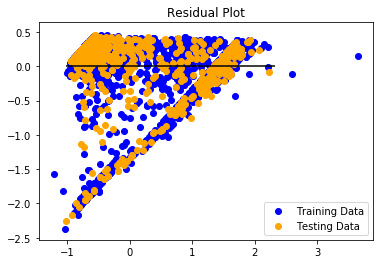

In [258]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [249]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.20491311480123187, R2: 0.7953033964155791


In [250]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.20426184186822707, R2: 0.7959539812135403


In [251]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2049134731967277, R2: 0.795303038398764


In [252]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.20494443381545208, R2: 0.7952721104930324
